## **Chapter 16 (Bonus) Apriori - Exercise**


### **Exercise 1: Store data version 1**
- Cho dữ liệu store data trong tập tin store_data.csv.
- Yêu cầu: Áp dụng thuật toán Apriori để tính toán mức độ kết hợp giữa các item.
- Đọc và chuẩn hóa dữ liệu
- Áp dụng Apriori, Tìm kết quả
- Trực quan hóa dữ liệu: Vẽ biểu đồ thể hiện 10 sản phẩm được mua nhiều nhất.
- Tìm kiếm thông tin từ kết quả: nếu mua 'milk' thì được gợi ý mua gì?

In [1]:
install.packages("arules")
install.packages("RColorBrewer")
library("devtools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library("arules")
library("RColorBrewer")

Loading required package: Matrix


Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




In [9]:
# https://drive.google.com/file/d/1X4hUwr1_ZDeTmC2I8Vrbznd067UgmG9l/view?usp=sharing
system('gdown --id 1X4hUwr1_ZDeTmC2I8Vrbznd067UgmG9l')

In [10]:
tr1 <- read.transactions("store_data.csv", format = "basket", sep=",")
tr1

Warning message in asMethod(object):
“removing duplicated items in transactions”


transactions in sparse format with
 7501 transactions (rows) and
 119 items (columns)

In [11]:
inspect(tr1[1:5])

    items               
[1] {almonds,           
     antioxydant juice, 
     avocado,           
     cottage cheese,    
     energy drink,      
     frozen smoothie,   
     green grapes,      
     green tea,         
     honey,             
     low fat yogurt,    
     mineral water,     
     olive oil,         
     salad,             
     salmon,            
     shrimp,            
     spinach,           
     tomato juice,      
     vegetables mix,    
     whole weat flour,  
     yams}              
[2] {burgers,           
     eggs,              
     meatballs}         
[3] {chutney}           
[4] {avocado,           
     turkey}            
[5] {energy bar,        
     green tea,         
     milk,              
     mineral water,     
     whole wheat rice}  


In [12]:
# make always sure that the items were properly separated
itemLabels(tr1)

[1] "almonds"              "antioxydant juice"    "asparagus"           
  [4] "avocado"              "babies food"          "bacon"               
  [7] "barbecue sauce"       "black tea"            "blueberries"         
 [10] "body spray"           "bramble"              "brownies"            
 [13] "bug spray"            "burger sauce"         "burgers"             
 [16] "butter"               "cake"                 "candy bars"          
 [19] "carrots"              "cauliflower"          "cereals"             
 [22] "champagne"            "chicken"              "chili"               
 [25] "chocolate"            "chocolate bread"      "chutney"             
 [28] "cider"                "clothes accessories"  "cookies"             
 [31] "cooking oil"          "corn"                 "cottage cheese"      
 [34] "cream"                "dessert wine"         "eggplant"            
 [37] "eggs"                 "energy bar"           "energy drink"        
 [40] "escalope"             "extra dark chocolate" "flax seed"           
 [43] "french fries"         "french wine"          "fresh bread"         
 [46] "fresh tuna"           "fromage blanc"        "frozen smoothie"     
 [49] "frozen vegetables"    "gluten free bar"      "grated cheese"       
 [52] "green beans"          "green grapes"         "green tea"           
 [55] "ground beef"          "gums"                 "ham"                 
 [58] "hand protein bar"     "herb & pepper"        "honey"               
 [61] "hot dogs"             "ketchup"              "light cream"         
 [64] "light mayo"           "low fat yogurt"       "magazines"           
 [67] "mashed potato"        "mayonnaise"           "meatballs"           
 [70] "melons"               "milk"                 "mineral water"       
 [73] "mint"                 "mint green tea"       "muffins"             
 [76] "mushroom cream sauce" "napkins"              "nonfat milk"         
 [79] "oatmeal"              "oil"                  "olive oil"           
 [82] "pancakes"             "parmesan cheese"      "pasta"               
 [85] "pepper"               "pet food"             "pickles"             
 [88] "protein bar"          "red wine"             "rice"                
 [91] "salad"                "salmon"               "salt"                
 [94] "sandwich"             "shallot"              "shampoo"             
 [97] "shrimp"               "soda"                 "soup"                
[100] "spaghetti"            "sparkling water"      "spinach"             
[103] "strawberries"         "strong cheese"        "tea"                 
[106] "tomato juice"         "tomato sauce"         "tomatoes"            
[109] "toothpaste"           "turkey"               "vegetables mix"      
[112] "water spray"          "white wine"           "whole weat flour"    
[115] "whole wheat pasta"    "whole wheat rice"     "yams"                
[118] "yogurt cake"          "zucchini"

In [13]:
# Ap dung Apriori
# Min support = 0.03, min conffidence = 0.3
# apriori() function
rules1 <- apriori(tr1, parameter = list(supp = 0.03, conf = 0.3))

Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5    0.03      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 225 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [36 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 done [0.00s].
writing ... [7 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [14]:
summary(rules1)

set of 7 rules

rule length distribution (lhs + rhs):sizes
2 
7 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.03373   Min.   :0.3214   Min.   :0.09505   Min.   :1.348  
 1st Qu.:0.03746   1st Qu.:0.3489   1st Qu.:0.09679   1st Qu.:1.464  
 Median :0.04093   Median :0.3704   Median :0.09825   Median :1.554  
 Mean   :0.04428   Mean   :0.3686   Mean   :0.12206   Mean   :1.634  
 3rd Qu.:0.05033   3rd Qu.:0.3869   3rd Qu.:0.14671   3rd Qu.:1.660  
 Max.   :0.05973   Max.   :0.4166   Max.   :0.17411   Max.   :2.291  
     count      
 Min.   :253.0  
 1st Qu.:281.0  
 Median :307.0  
 Mean   :332.1  
 3rd Qu.:377.5  
 Max.   :448.0  

mining info:
 data ntransactions support confidence
  tr1          7501    0.03        0.3
                                                           call
 apriori(data = tr1, parameter = list(sup

In [15]:
# inspect() function
inspect(rules1)


    lhs                    rhs             support    confidence coverage  
[1] {pancakes}          => {mineral water} 0.03372884 0.3548387  0.09505399
[2] {frozen vegetables} => {mineral water} 0.03572857 0.3748252  0.09532062
[3] {ground beef}       => {spaghetti}     0.03919477 0.3989145  0.09825357
[4] {ground beef}       => {mineral water} 0.04092788 0.4165536  0.09825357
[5] {milk}              => {mineral water} 0.04799360 0.3703704  0.12958272
[6] {chocolate}         => {mineral water} 0.05265965 0.3213995  0.16384482
[7] {spaghetti}         => {mineral water} 0.05972537 0.3430322  0.17411012
    lift     count
[1] 1.488616 253  
[2] 1.572463 268  
[3] 2.291162 294  
[4] 1.747522 307  
[5] 1.553774 360  
[6] 1.348332 395  
[7] 1.439085 448  


In [16]:
# FILTER
# The rules1 has lift > 1.5
filtered_rules1 <- subset(rules1, subset = lift > 1.5)
summary(filtered_rules1)


set of 4 rules

rule length distribution (lhs + rhs):sizes
2 
4 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support          confidence        coverage            lift      
 Min.   :0.03573   Min.   :0.3704   Min.   :0.09532   Min.   :1.554  
 1st Qu.:0.03833   1st Qu.:0.3737   1st Qu.:0.09752   1st Qu.:1.568  
 Median :0.04006   Median :0.3869   Median :0.09825   Median :1.660  
 Mean   :0.04096   Mean   :0.3902   Mean   :0.10535   Mean   :1.791  
 3rd Qu.:0.04269   3rd Qu.:0.4033   3rd Qu.:0.10609   3rd Qu.:1.883  
 Max.   :0.04799   Max.   :0.4166   Max.   :0.12958   Max.   :2.291  
     count      
 Min.   :268.0  
 1st Qu.:287.5  
 Median :300.5  
 Mean   :307.2  
 3rd Qu.:320.2  
 Max.   :360.0  

mining info:
 data ntransactions support confidence
  tr1          7501    0.03        0.3
                                                           call
 apriori(data = tr1, parameter = list(sup

In [20]:
# calculates support for frequent items
# How to see the most frequent items?

frequentItems1 <- eclat (tr1, parameter = list(supp = 0.05))
inspect(frequentItems1)

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.05      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 375 

create itemset ... 
set transactions ...[119 item(s), 7501 transaction(s)] done [0.00s].
sorting and recoding items ... [25 item(s)] done [0.00s].
creating sparse bit matrix ... [25 row(s), 7501 column(s)] done [0.00s].
writing  ... [28 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items                      support    count
[1]  {chocolate, mineral water} 0.05265965  395 
[2]  {eggs, mineral water}      0.05092654  382 
[3]  {mineral water, spaghetti} 0.05972537  448 
[4]  {mineral water}            0.23836822 1788 
[5]  {spaghetti}                0.17411012 1306 
[6]  {eggs}                     0.17970937 1348 
[7]  {chocolate}                0.16384482 1229 
[8]  {french fries}             0.17091055 1282 
[9]  {milk}      

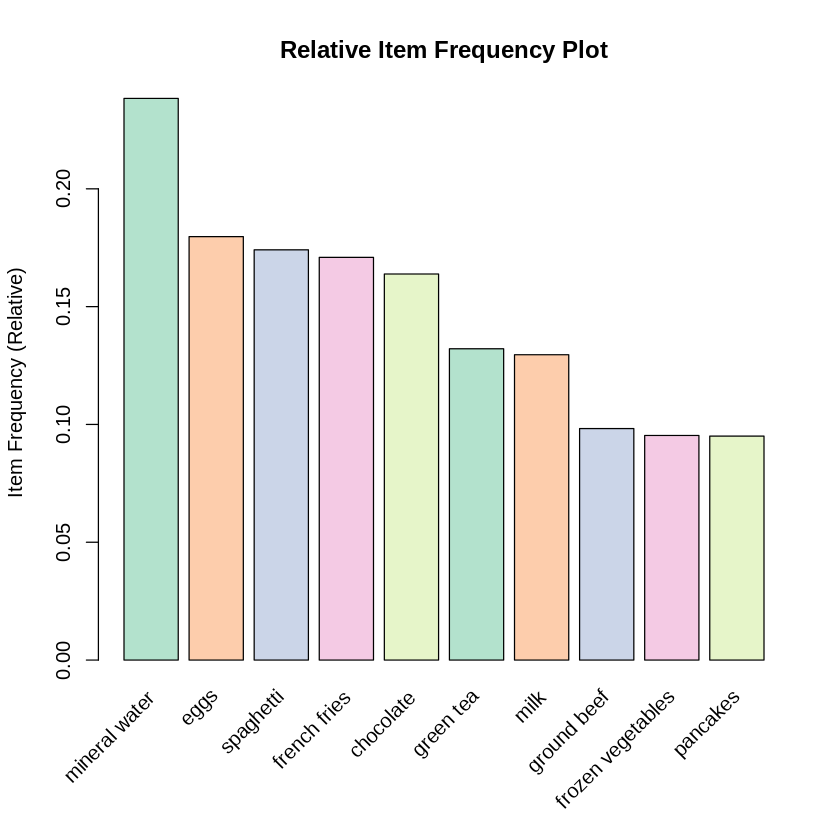

In [21]:
# itemFrequencyPlot() function
arules::itemFrequencyPlot(tr1, topN = 10,
                        col = brewer.pal(5, 'Pastel2'),
                        main = 'Relative Item Frequency Plot',
                        type = "relative",
                        ylab = "Item Frequency (Relative)"
)


In [22]:
# Extract rules with specific items: "milk"
milk_rules_lhs <- subset(rules1, subset=lhs %pin% 'milk')
summary(milk_rules_lhs)

set of 1 rules

rule length distribution (lhs + rhs):sizes
2 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support          confidence        coverage           lift      
 Min.   :0.04799   Min.   :0.3704   Min.   :0.1296   Min.   :1.554  
 1st Qu.:0.04799   1st Qu.:0.3704   1st Qu.:0.1296   1st Qu.:1.554  
 Median :0.04799   Median :0.3704   Median :0.1296   Median :1.554  
 Mean   :0.04799   Mean   :0.3704   Mean   :0.1296   Mean   :1.554  
 3rd Qu.:0.04799   3rd Qu.:0.3704   3rd Qu.:0.1296   3rd Qu.:1.554  
 Max.   :0.04799   Max.   :0.3704   Max.   :0.1296   Max.   :1.554  
     count    
 Min.   :360  
 1st Qu.:360  
 Median :360  
 Mean   :360  
 3rd Qu.:360  
 Max.   :360  

mining info:
 data ntransactions support confidence
  tr1          7501    0.03        0.3
                                                           call
 apriori(data = tr1, parameter = list(supp = 0.03, conf = 0.3)

In [23]:
inspect(milk_rules_lhs)

    lhs       rhs             support   confidence coverage  lift     count
[1] {milk} => {mineral water} 0.0479936 0.3703704  0.1295827 1.553774 360  


In [26]:
# Extract rules with specific items: "milk"
milk_rules_rhs <- subset(rules1, subset=rhs %pin% 'milk')
summary(milk_rules_rhs)

inspect(milk_rules_rhs)

set of 0 rules


In [27]:
## Convert rules matrix to dataframe
rules1_df <- DATAFRAME(rules1, setStart='', setEnd='', separate = TRUE)
## Check
rules1_df

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,pancakes,mineral water,0.03372884,0.3548387,0.09505399,1.488616,253
2,frozen vegetables,mineral water,0.03572857,0.3748252,0.09532062,1.572463,268
3,ground beef,spaghetti,0.03919477,0.3989145,0.09825357,2.291162,294
4,ground beef,mineral water,0.04092788,0.4165536,0.09825357,1.747522,307
5,milk,mineral water,0.04799360,0.3703704,0.12958272,1.553774,360
6,chocolate,mineral water,0.05265965,0.3213995,0.16384482,1.348332,395
7,spaghetti,mineral water,0.05972537,0.3430322,0.17411012,1.439085,448


### **Exercise 2: Store data version 2**
- Cho dữ liệu store data trong tập tin dataset_group.csv.
- Yêu cầu: Áp dụng thuật toán Apriori để tính toán mức độ kết hợp giữa các item.
- Đọc và chuẩn hóa dữ liệu
- Áp dụng Apriori, Tìm kết quả
- Trực quan hóa dữ liệu: Vẽ biểu đồ thể hiện 10 sản phẩm được mua nhiều nhất.
- Tìm kiếm thông tin từ kết quả: nếu mua 'eggs' thì được gợi ý mua gì?


In [28]:
# https://drive.google.com/file/d/1DrsR72Tk-no3lpSs06erVXQ6TxqxEKVm/view?usp=sharing
system('gdown --id 1DrsR72Tk-no3lpSs06erVXQ6TxqxEKVm')

In [29]:
tr3 <- read.transactions("dataset_group.csv",
                        format = "single",
                        sep = ",",
                        cols = c(2,3))
tr3

transactions in sparse format with
 1139 transactions (rows) and
 38 items (columns)

In [30]:
inspect(tr3[1:2])

    items                           transactionID
[1] {all- purpose,                               
     aluminum foil,                              
     beef,                                       
     butter,                                     
     dinner rolls,                               
     flour,                                      
     ice cream,                                  
     laundry detergent,                          
     lunch meat,                                 
     mixes,                                      
     pork,                                       
     sandwich bags,                              
     shampoo,                                    
     soap,                                       
     soda,                                       
     vegetables,                                 
     yogurt}                                   1 
[2] {bagels,                                     
     beef,                                       


In [31]:
itemLabels(tr3)

[1] "all- purpose"                 "aluminum foil"               
 [3] "bagels"                       "beef"                        
 [5] "butter"                       "cereals"                     
 [7] "cheeses"                      "coffee/tea"                  
 [9] "dinner rolls"                 "dishwashing liquid/detergent"
[11] "eggs"                         "flour"                       
[13] "fruits"                       "hand soap"                   
[15] "ice cream"                    "individual meals"            
[17] "juice"                        "ketchup"                     
[19] "laundry detergent"            "lunch meat"                  
[21] "milk"                         "mixes"                       
[23] "paper towels"                 "pasta"                       
[25] "pork"                         "poultry"                     
[27] "sandwich bags"                "sandwich loaves"             
[29] "shampoo"                      "soap"                        
[31] "soda"                         "spaghetti sauce"             
[33] "sugar"                        "toilet paper"                
[35] "tortillas"                    "vegetables"                  
[37] "waffles"                      "yogurt"

In [32]:
# Ap dung Apriori
# Min support = 0.3, min conffidence = 0.3
# apriori() function
rules3 <- apriori(tr3, parameter = list(supp = 0.3, conf = 0.3))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.3    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 341 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[38 item(s), 1139 transaction(s)] done [0.00s].
sorting and recoding items ... [38 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 done [0.00s].
writing ... [66 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].


In [33]:
summary(rules3)

set of 66 rules

rule length distribution (lhs + rhs):sizes
 1  2 
38 28 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.424   2.000   2.000 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.3003   Min.   :0.3459   Min.   :0.3784   Min.   :1.000  
 1st Qu.:0.3108   1st Qu.:0.3758   1st Qu.:0.7392   1st Qu.:1.000  
 Median :0.3617   Median :0.3946   Median :1.0000   Median :1.000  
 Mean   :0.3552   Mean   :0.4813   Mean   :0.8157   Mean   :1.033  
 3rd Qu.:0.3791   3rd Qu.:0.4394   3rd Qu.:1.0000   3rd Qu.:1.067  
 Max.   :0.7392   Max.   :0.8378   Max.   :1.0000   Max.   :1.133  
     count      
 Min.   :342.0  
 1st Qu.:354.0  
 Median :412.0  
 Mean   :404.6  
 3rd Qu.:431.8  
 Max.   :842.0  

mining info:
 data ntransactions support confidence
  tr3          1139     0.3        0.3
                                                          call
 apriori(data = tr3, parameter = list(supp = 0.

In [34]:
# inspect() function
inspect(rules3[1:10])

     lhs    rhs               support   confidence coverage lift count
[1]  {}  => {hand soap}       0.3459175 0.3459175  1        1    394  
[2]  {}  => {sandwich loaves} 0.3494293 0.3494293  1        1    398  
[3]  {}  => {pork}            0.3555751 0.3555751  1        1    405  
[4]  {}  => {flour}           0.3529412 0.3529412  1        1    402  
[5]  {}  => {butter}          0.3678665 0.3678665  1        1    419  
[6]  {}  => {sugar}           0.3608428 0.3608428  1        1    411  
[7]  {}  => {tortillas}       0.3696225 0.3696225  1        1    421  
[8]  {}  => {fruits}          0.3705004 0.3705004  1        1    422  
[9]  {}  => {shampoo}         0.3687445 0.3687445  1        1    420  
[10] {}  => {sandwich bags}   0.3678665 0.3678665  1        1    419  


In [35]:
# FILTER
# The rules3 has lift > 1.1
filtered_rules3 <- subset(rules3, subset = lift > 1.1)
summary(filtered_rules3)

set of 6 rules

rule length distribution (lhs + rhs):sizes
2 
6 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.3090   Min.   :0.4181   Min.   :0.3784   Min.   :1.105  
 1st Qu.:0.3117   1st Qu.:0.4347   1st Qu.:0.3859   1st Qu.:1.110  
 Median :0.3196   Median :0.6293   Median :0.5645   Median :1.124  
 Mean   :0.3184   Mean   :0.6296   Mean   :0.5618   Mean   :1.121  
 3rd Qu.:0.3248   3rd Qu.:0.8275   3rd Qu.:0.7392   3rd Qu.:1.131  
 Max.   :0.3266   Max.   :0.8378   Max.   :0.7392   Max.   :1.133  
     count      
 Min.   :352.0  
 1st Qu.:355.0  
 Median :364.0  
 Mean   :362.7  
 3rd Qu.:370.0  
 Max.   :372.0  

mining info:
 data ntransactions support confidence
  tr3          1139     0.3        0.3
                                                          call
 apriori(data = tr3, parameter = list(supp = 0.3, conf =

In [36]:
# most frequent items
# calculates support for frequent items
frequentItems3 <- eclat (tr3, parameter = list(supp = 0.35))
inspect(sort(frequentItems3, by="support", decreasing = TRUE))

Eclat

parameter specification:
 tidLists support minlen maxlen            target  ext
    FALSE    0.35      1     10 frequent itemsets TRUE

algorithmic control:
 sparse sort verbose
      7   -2    TRUE

Absolute minimum support count: 398 

create itemset ... 
set transactions ...[38 item(s), 1139 transaction(s)] done [0.00s].
sorting and recoding items ... [36 item(s)] done [0.00s].
creating bit matrix ... [36 row(s), 1139 column(s)] done [0.00s].
writing  ... [36 set(s)] done [0.00s].
Creating S4 object  ... done [0.00s].
     items                          support   count
[1]  {vegetables}                   0.7392450 842  
[2]  {poultry}                      0.4214223 480  
[3]  {ice cream}                    0.3985953 454  
[4]  {cereals}                      0.3959614 451  
[5]  {lunch meat}                   0.3950834 450  
[6]  {waffles}                      0.3942054 449  
[7]  {cheeses}                      0.3906936 445  
[8]  {soda}                         0.3906936 445 

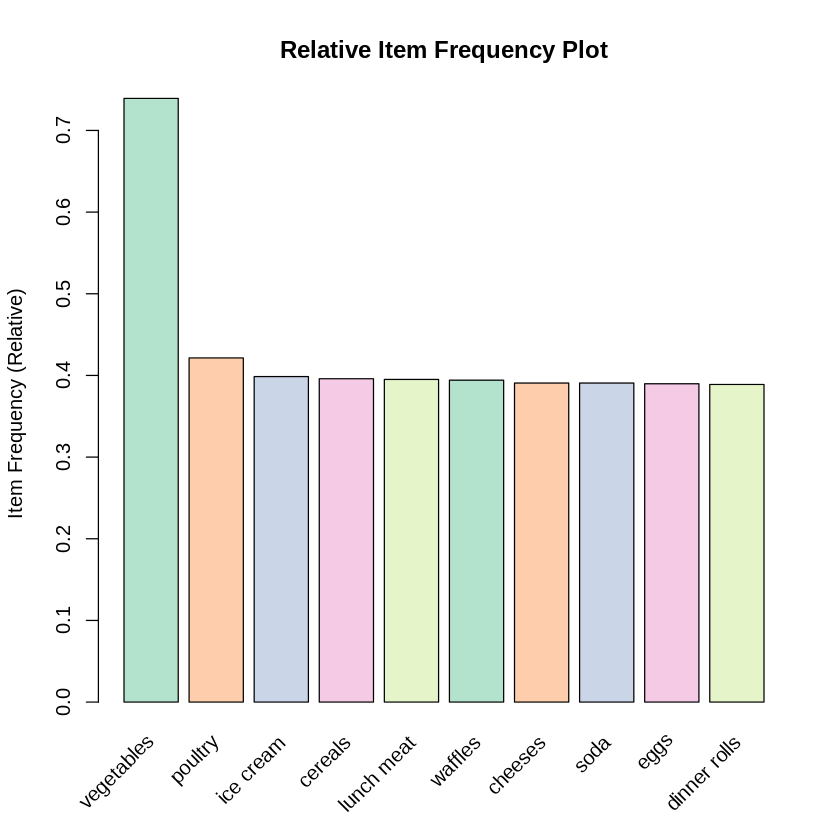

In [37]:
arules::itemFrequencyPlot(tr3, topN = 10,
                        col = brewer.pal(5, 'Pastel2'),
                        main = 'Relative Item Frequency Plot',
                        type = "relative",
                        ylab = "Item Frequency (Relative)")


In [38]:
# Extract rules with specific items: "eggs"
eggs_rules_lhs <- subset(rules3, subset= lhs %pin% 'eggs')
summary(eggs_rules_lhs)

set of 1 rules

rule length distribution (lhs + rhs):sizes
2 
1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      2       2       2       2       2       2 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.3266   Min.   :0.8378   Min.   :0.3898   Min.   :1.133  
 1st Qu.:0.3266   1st Qu.:0.8378   1st Qu.:0.3898   1st Qu.:1.133  
 Median :0.3266   Median :0.8378   Median :0.3898   Median :1.133  
 Mean   :0.3266   Mean   :0.8378   Mean   :0.3898   Mean   :1.133  
 3rd Qu.:0.3266   3rd Qu.:0.8378   3rd Qu.:0.3898   3rd Qu.:1.133  
 Max.   :0.3266   Max.   :0.8378   Max.   :0.3898   Max.   :1.133  
     count    
 Min.   :372  
 1st Qu.:372  
 Median :372  
 Mean   :372  
 3rd Qu.:372  
 Max.   :372  

mining info:
 data ntransactions support confidence
  tr3          1139     0.3        0.3
                                                          call
 apriori(data = tr3, parameter = list(supp = 0.3, conf = 0.3))

In [39]:
inspect(eggs_rules_lhs)

    lhs       rhs          support   confidence coverage  lift    count
[1] {eggs} => {vegetables} 0.3266023 0.8378378  0.3898156 1.13337 372  


In [40]:
# Extract rules with specific items: "eggs"
eggs_rules_rhs <- subset(rules3, subset=rhs %pin% 'eggs')
summary(eggs_rules_rhs)

set of 2 rules

rule length distribution (lhs + rhs):sizes
1 2 
1 1 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    1.25    1.50    1.50    1.75    2.00 

summary of quality measures:
    support         confidence        coverage           lift      
 Min.   :0.3266   Min.   :0.3898   Min.   :0.7392   Min.   :1.000  
 1st Qu.:0.3424   1st Qu.:0.4028   1st Qu.:0.8044   1st Qu.:1.033  
 Median :0.3582   Median :0.4158   Median :0.8696   Median :1.067  
 Mean   :0.3582   Mean   :0.4158   Mean   :0.8696   Mean   :1.067  
 3rd Qu.:0.3740   3rd Qu.:0.4288   3rd Qu.:0.9348   3rd Qu.:1.100  
 Max.   :0.3898   Max.   :0.4418   Max.   :1.0000   Max.   :1.133  
     count    
 Min.   :372  
 1st Qu.:390  
 Median :408  
 Mean   :408  
 3rd Qu.:426  
 Max.   :444  

mining info:
 data ntransactions support confidence
  tr3          1139     0.3        0.3
                                                          call
 apriori(data = tr3, parameter = list(supp = 0.3, conf = 0.3))

In [41]:
## Convert rules matrix to dataframe
rules3_df <- DATAFRAME(rules3, setStart='', setEnd='', separate = TRUE)
rules3_df

,LHS,RHS,support,confidence,coverage,lift,count
,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,,hand soap,0.3459175,0.3459175,1,1,394
2,,sandwich loaves,0.3494293,0.3494293,1,1,398
3,,pork,0.3555751,0.3555751,1,1,405
4,,flour,0.3529412,0.3529412,1,1,402
5,,butter,0.3678665,0.3678665,1,1,419
6,,sugar,0.3608428,0.3608428,1,1,411
7,,tortillas,0.3696225,0.3696225,1,1,421
8,,fruits,0.3705004,0.3705004,1,1,422
9,,shampoo,0.3687445,0.3687445,1,1,420
